## Chapter 4: Classification Lab Exercises

We are going to load the "Stock Market" data set in order to carry out the lab exercises.

About the dataset: 
    
Daily percentage returns for the S&P 500 stock index between 2001 and 2005. 

This dataset has 8 predictor variables ( numeric) and one target/ response variable ( "Direction" - MEdian value of owner-occupied homes.) It has 1250 observations.

The description of the various predictor/response variables is provided below:

* Year: The year that the observation was recorded
* Lag1 : Percentage return for previous day
* Lag2 : Percentage return for 2 days previous
* Lag3 : Percentage return for 3 days previous
* Lag4 : Percentage return for 4 days previous
* Lag5 : Percentage return for 5 days previous
* Volume : Volume of shares traded (number of daily shares traded in billions)
* Today : Percentage return for today
* Direction : A factor with levels Down and Up indicating whether the market had a positive or negative return on a given day

Source of dataset: https://app.quadstat.net/dataset/r-dataset-package-islr-smarket

Original source: Raw values of the S&P 500 were obtained from Yahoo Finance and then converted to percentages and lagged.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline

In [3]:
smarket = pd.read_csv('./data/smarket.csv')

In [4]:
smarket.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [6]:
smarket.shape # It now has 1250 observations with 8 predictors and one target variable

(1250, 9)

In [7]:
smarket.isnull().any() # Check to see if any null value exists

Year         False
Lag1         False
Lag2         False
Lag3         False
Lag4         False
Lag5         False
Volume       False
Today        False
Direction    False
dtype: bool

In [8]:
smarket.describe() # basic statistics on the data in the columns

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000
mean,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138
std,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334
min,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000
25%,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500
50%,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500
75%,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750
max,2005.000000,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470,5.733000


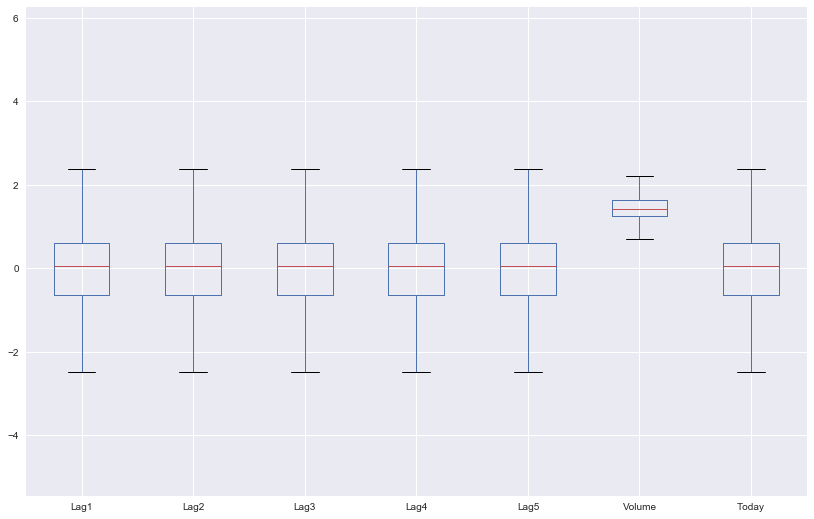

In [13]:
smarket.drop(['Year'],axis=1).boxplot()

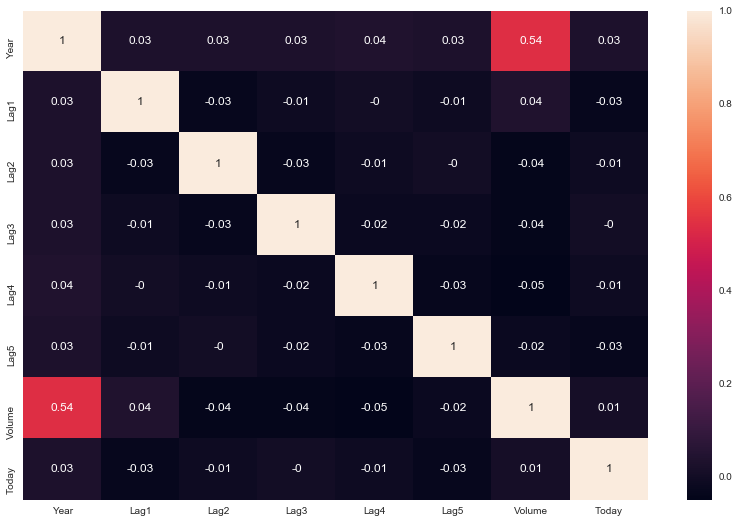

In [11]:
# Check the correlation of different variables with each other
smarket_corr_matrix = smarket.corr().round(2)

sns.set(rc={'figure.figsize': (14,9)})
sns.heatmap(data=smarket_corr_matrix, annot=True) # Annot = True to print the values inside the square

plt.show()

As we can see, the predictor variables hardly exhibit any correaltion among themselves with the exception of Volume~Year.

### Approach 1: Binary Classification using glm

In [19]:
model = sm.formula.glm("Direction ~ Year + Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume",family=sm.families.Binomial(), data=smarket)
res = model.fit()
print(res.summary())

                          Generalized Linear Model Regression Results                           
Dep. Variable:     ['Direction[Down]', 'Direction[Up]']   No. Observations:                 1250
Model:                                              GLM   Df Residuals:                     1242
Model Family:                                  Binomial   Df Model:                            7
Link Function:                                    logit   Scale:                          1.0000
Method:                                            IRLS   Log-Likelihood:                -860.23
Date:                                  Wed, 22 Jan 2020   Deviance:                       1720.5
Time:                                          08:33:46   Pearson chi2:                 1.25e+03
No. Iterations:                                       4   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------

They all have quite high p-values apart from Year.

In [23]:
res.params

Intercept    258.163509
Year          -0.129029
Lag1           0.074889
Lag2           0.051538
Lag3          -0.001620
Lag4           0.001108
Lag5          -0.003282
Volume         0.141334
dtype: float64

In [25]:
res.conf_int()

,0,1
Intercept,68.057559,448.269458
Year,-0.224089,-0.033969
Lag1,-0.023654,0.173432
Lag2,-0.047087,0.150163
Lag3,-0.099934,0.096693
Lag4,-0.097354,0.099569
Lag5,-0.100657,0.094094
Volume,-0.230491,0.513159


In [40]:
model_predictions = model.predict(res.params)

In [42]:
predicted = ['Down']*1250
for i, value in enumerate(model_predictions):
    if value > 0.5:
        predicted[i] = 'Up'

In [44]:
ps = pd.Series(predicted)
ps.value_counts()

Down    839
Up      411
dtype: int64

In [53]:
df = pd.DataFrame(smarket['Direction'],columns=['Direction'])
df['Predicted'] = predicted
pred_Direction = pd.crosstab(index=df["Direction"], columns=df["Predicted"])
#pred_Direction.index= ["Up","Down"]

pred_Direction

Predicted,Down,Up
Direction,,
Down,381,221
Up,458,190


As we can see, the model is highly inaccurate. Our model correctly predicted only 571 times out of 1250.

### Approach 2: Binary Classification using sklearn's LogisticRegression

In [63]:
from sklearn import preprocessing

In [93]:
# Converting categorical variable to numeric for Direction.
le = preprocessing.LabelEncoder()
le.fit(smarket['Direction'])
list(le.classes_)

['Down', 'Up']

In [67]:
direction_trans = le.transform(smarket['Direction'])

In [89]:
X = smarket.drop(['Today','Direction'],axis=1)
y = smarket['Direction']
#y = pd.DataFrame(direction_trans,columns=['Direction'])

In [90]:
X.shape
y.shape

(1250,)

In [91]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

print("Training X shape : " + str(X_train.shape) + ", y shape : " + str(y_train.shape))
print("Test X shape : " + str(X_test.shape) + ", y shape : " + str(y_test.shape))

Training X shape : (1000, 7), y shape : (1000,)
Test X shape : (250, 7), y shape : (250,)


In [92]:
# We now setup a logistic regression model. First, we train it over the training data and then test it on the test set.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

lModel = LogisticRegression()
lModel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [98]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [99]:
# model evaluation for training set
y_train_predict = lModel.predict(X_train)
smarket_confusion_matrix = confusion_matrix(y_train,y_train_predict)
print('Training set')
print(smarket_confusion_matrix)
print(classification_report(y_train, y_train_predict))

# model evaluation for test set
y_test_predict = lModel.predict(X_test)
smarket_confusion_matrix = confusion_matrix(y_test,y_test_predict)
print('Test set')
print(smarket_confusion_matrix)
print(classification_report(y_test, y_test_predict))

Training set
[[ 76 400]
 [ 73 451]]
             precision    recall  f1-score   support

       Down       0.51      0.16      0.24       476
         Up       0.53      0.86      0.66       524

avg / total       0.52      0.53      0.46      1000

Test set
[[ 21 105]
 [ 12 112]]
             precision    recall  f1-score   support

       Down       0.64      0.17      0.26       126
         Up       0.52      0.90      0.66       124

avg / total       0.58      0.53      0.46       250



Looking at the p-values, we can decide to pick only certain predictor variables and see how the model performs. Let us choose only Year, Lag1 and Lag2.

In [100]:
X = smarket.drop(['Today','Direction','Lag3','Lag4','Lag5'],axis=1)
y = smarket['Direction']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

lModel = LogisticRegression()
lModel.fit(X_train, y_train)

y_train_predict = lModel.predict(X_train)
smarket_confusion_matrix = confusion_matrix(y_train,y_train_predict)
print('Training set')
print(smarket_confusion_matrix)
print(classification_report(y_train, y_train_predict))

# model evaluation for test set
y_test_predict = lModel.predict(X_test)
smarket_confusion_matrix = confusion_matrix(y_test,y_test_predict)
print('Test set')
print(smarket_confusion_matrix)
print(classification_report(y_test, y_test_predict))

Training set
[[ 75 401]
 [ 66 458]]
             precision    recall  f1-score   support

       Down       0.53      0.16      0.24       476
         Up       0.53      0.87      0.66       524

avg / total       0.53      0.53      0.46      1000

Test set
[[ 19 107]
 [ 12 112]]
             precision    recall  f1-score   support

       Down       0.61      0.15      0.24       126
         Up       0.51      0.90      0.65       124

avg / total       0.56      0.52      0.45       250



As expected, the model does perform better.